# Text Pre-processing

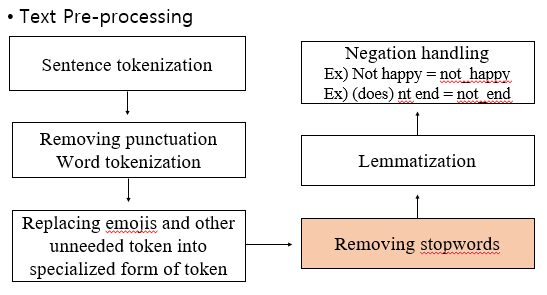

# Loading Data

In [4]:
import pandas as pd

lonely_3to4= pd.read_csv('C:\\Users\\lovel\\Documents\\hfpsych\\Loneliness_Web-scrap\\3~4_lonely_subreddit.csv', encoding='utf-8', sep=',', na_values=['NULL'])

lonely_3to4['subreddit']= 'lonely'

idx_deleted = lonely_3to4[lonely_3to4['Body']=="[deleted]"].index
lonely_3to4 = lonely_3to4.drop(idx_deleted)
idx_removed = lonely_3to4[lonely_3to4['Body']=="[removed]"].index
lonely_3to4 = lonely_3to4.drop(idx_removed)

lonely_3to4['Title_wordcounts']= lonely_3to4.Title.apply(lambda x: len(str(x).split(' ')))
lonely_3to4['Body_wordcounts']= lonely_3to4.Body.apply(lambda x: len(str(x).split(' ')))

#https://hippocampus-garden.com/pandas_loc/
for i in lonely_3to4.index:
    if pd.isnull(lonely_3to4.loc[i,"Body"]) == True:
        lonely_3to4.loc[i,"Body_wordcounts"] = 0
        
data= lonely_3to4.reset_index(drop=True)
data

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,subreddit,Title_wordcounts,Body_wordcounts
0,fpmscg,hi,is anyone willing to just talk to me? i really...,https://www.reddit.com/r/lonely/comments/fpmsc...,0033070302,1,2020-03-27 09:07:29,5,/r/lonely/comments/fpmscg/hi/,NaN,lonely,1,24
1,fpmt1w,"If you are lonely at the age 23, hit me up",and lets change that together!,https://www.reddit.com/r/lonely/comments/fpmt1...,Boredom51,1,2020-03-27 09:08:45,4,/r/lonely/comments/fpmt1w/if_you_are_lonely_at...,NaN,lonely,11,5
2,fpmwk0,Trying to make friends,"Hi everyone , hope you're all doing well with ...",https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1,2020-03-27 09:15:03,0,/r/lonely/comments/fpmwk0/trying_to_make_friends/,NaN,lonely,4,259
3,fpn8yx,I'm desperate,"I have applied to some universities in the US,...",https://www.reddit.com/r/lonely/comments/fpn8y...,ravenanana,1,2020-03-27 09:36:37,0,/r/lonely/comments/fpn8yx/im_desperate/,NaN,lonely,2,148
4,fpnajw,Really wish I had someone to call. It'd be nic...,NaN,https://www.reddit.com/r/lonely/comments/fpnaj...,wiatbenjamin,1,2020-03-27 09:39:17,1,/r/lonely/comments/fpnajw/really_wish_i_had_so...,NaN,lonely,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,fvbxqh,I can barely close my eyes without seeing thei...,"I loved them so much and they just, left me ag...",https://www.reddit.com/r/lonely/comments/fvbxq...,TheFearlessFrog,1,2020-04-05 19:46:41,5,/r/lonely/comments/fvbxqh/i_can_barely_close_m...,NaN,lonely,10,47
1272,fvc9se,"I can relate to being lonely, so hope this helps",https://imgur.com/a/WfooXlF\n\n\nI’m going sti...,https://www.reddit.com/r/lonely/comments/fvc9s...,SEXWORKA,1,2020-04-05 20:17:41,0,/r/lonely/comments/fvc9se/i_can_relate_to_bein...,NaN,lonely,10,19
1273,fvce8u,My first ever poem,I don't know If this is the right place to pos...,https://www.reddit.com/r/lonely/comments/fvce8...,parlejibiscoot,1,2020-04-05 20:29:28,0,/r/lonely/comments/fvce8u/my_first_ever_poem/,NaN,lonely,4,120
1274,fvcg9b,Life goes on,It had been 3 years since I saw the only perso...,https://www.reddit.com/r/lonely/comments/fvcg9...,rx9ue,1,2020-04-05 20:34:57,0,/r/lonely/comments/fvcg9b/life_goes_on/,NaN,lonely,3,186


# 1. Sentence Tokenization
## : NLTK

In [5]:
from nltk import sent_tokenize
#na는 -123456789로 처리, 후에 다시 삭제 예정

#without flattening
data_title_s= [sent_tokenize(str(sent)) for sent in data['Title'].fillna(value=-123456789, inplace=False)]
data_body_s= [sent_tokenize(str(sent)) for sent in data['Body'].fillna(value=-123456789, inplace=False)]

In [14]:
print(data_title_s[:10])

[['hi'], ['If you are lonely at the age 23, hit me up'], ['Trying to make friends'], ["I'm desperate"], ['Really wish I had someone to call.', "It'd be nice to hear a real voice other than my own.", 'Some people are real lucky having a girl they can talk with over the phone.'], ['I try so hard but I keep getting hurt'], ['"I tried so hard, and got so far, but in the end, It doesn\'t even matter" -LP'], ["I got my driver's license today"], ['Sat in the Shower and Sang "Hey Jude"'], ['I’ve been that one weird/“sped” kid that everyone avoids or makes fun of my entire life']]


In [7]:
#without flattening
data_title_s_f = [item for sent in data_title_s for item in sent]
data_body_s_f = [item for sent in data_body_s for item in sent]

In [16]:
print(data_title_s_f[:10])

['hi', 'If you are lonely at the age 23, hit me up', 'Trying to make friends', "I'm desperate", 'Really wish I had someone to call.', "It'd be nice to hear a real voice other than my own.", 'Some people are real lucky having a girl they can talk with over the phone.', 'I try so hard but I keep getting hurt', '"I tried so hard, and got so far, but in the end, It doesn\'t even matter" -LP', "I got my driver's license today"]


# 2. Word Tokenization ~ 5. Lemmatization

## 1) NLTK

### word tokenization

In [9]:
from nltk import word_tokenize

title_words_nltk= []
for sent in data_title_s_f:
    title_words_nltk.append(list(map(str.lower, word_tokenize(sent))))

body_words_nltk= []
for sent in data_body_s_f:
    body_words_nltk.append(list(map(str.lower, word_tokenize(sent))))

In [10]:
print(title_words_nltk[:10])

[['hi'], ['if', 'you', 'are', 'lonely', 'at', 'the', 'age', '23', ',', 'hit', 'me', 'up'], ['trying', 'to', 'make', 'friends'], ['i', "'m", 'desperate'], ['really', 'wish', 'i', 'had', 'someone', 'to', 'call', '.'], ['it', "'d", 'be', 'nice', 'to', 'hear', 'a', 'real', 'voice', 'other', 'than', 'my', 'own', '.'], ['some', 'people', 'are', 'real', 'lucky', 'having', 'a', 'girl', 'they', 'can', 'talk', 'with', 'over', 'the', 'phone', '.'], ['i', 'try', 'so', 'hard', 'but', 'i', 'keep', 'getting', 'hurt'], ['``', 'i', 'tried', 'so', 'hard', ',', 'and', 'got', 'so', 'far', ',', 'but', 'in', 'the', 'end', ',', 'it', 'does', "n't", 'even', 'matter', "''", '-lp'], ['i', 'got', 'my', 'driver', "'s", 'license', 'today']]


In [11]:
#flattening
title_words_nltk_f= [item for word in title_words_nltk for item in word]  
body_words_nltk_f= [item for word in body_words_nltk for item in word] 

In [13]:
print(title_words_nltk_f[:50])

['hi', 'if', 'you', 'are', 'lonely', 'at', 'the', 'age', '23', ',', 'hit', 'me', 'up', 'trying', 'to', 'make', 'friends', 'i', "'m", 'desperate', 'really', 'wish', 'i', 'had', 'someone', 'to', 'call', '.', 'it', "'d", 'be', 'nice', 'to', 'hear', 'a', 'real', 'voice', 'other', 'than', 'my', 'own', '.', 'some', 'people', 'are', 'real', 'lucky', 'having', 'a', 'girl']


### remove stopwords & punctuation

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words("english")
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lovel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
stopwords = {"en":["me", "my", "I", "i", "I'd", "I'll", "I'm", "I've", 'myself', 'we', 'our', 'ours', 'ourselves', 'u', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', "'s", 's', 't', 'can', 'will', 'would', 'just', 'do', 'should', "should've", 'now', "'d", 'd', "'ll", 'll', "'m", 'm', 'o', "'re", 're', "'ve", 've', 'y', 'are', 'able', 'can', 'ca', 'could', 'do', 'did', 'does', 'had', 'has', 'have', 'is', 'ma']}
stopwords_en= set(stopwords['en'])
stopwords_my= {"very", "really", "so", "especially", "get", "go", "exactly", "actually", "even", "le", "feel", "felt", "feels", "feeling", "always", "sometimes", "often", "rarely", "seldom", "barely", "also", "but", "however", "nevertheless", "though", "although", "besides", "if", "whether"}
stopwords_punct = set(punctuation)
stoplist_combined = set.union(stopwords_my, stopwords_en, stopwords_punct)
print(stoplist_combined)

{'could', "you're", 'll', 'while', '(', 'this', 'does', 'against', 'some', 'both', 'if', 'has', '[', 'though', 'or', 'be', '^', 've', 'had', '#', 'as', 'off', "I've", 'to', 'even', 'being', 'which', '}', 'rarely', 'yours', 'besides', 'above', '`', 'd', 'o', "'ve", 'was', '@', '!', 'there', 'nevertheless', 'theirs', 'over', 'more', 'about', 'me', "you'll", 'into', 'how', '*', "'ll", 'by', 'also', 'such', 'any', ']', 'should', 'having', 'again', 's', 'but', 'am', '+', ')', 'him', 'after', 'of', 'a', 'although', 'when', 'your', 'he', 'and', 'what', 'been', 'those', 'just', 'now', 'own', 'for', 'only', 'so', 'at', 'up', 'i', 'their', 'in', "'m", 'an', 'from', 'le', "I'll", 'seldom', 'very', 'myself', '\\', "that'll", 'can', ',', 'able', '<', 'until', 'them', 'itself', 'where', 'often', "'d", 'whom', '{', "it's", 'under', 'himself', 'each', 'really', 'we', 'yourself', "I'd", 'did', "she's", 'doing', '.', '%', 'then', 'barely', '/', 'do', 'will', "'re", 'down', 'you', '$', 're', '"', 'they',

In [22]:
#flattened
title_cleaned_nltk_f=[word for word in title_words_nltk_f if word not in stoplist_combined]
body_cleaned_nltk_f=[word for word in body_words_nltk_f if word not in stoplist_combined]

In [23]:
#Lemmatization function
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(text): 
    # Text input is string, returns lowercased strings.
    return [wnl.lemmatize(word.strip(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(text)]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lovel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lovel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
title_lem= lemmatize_sent(title_cleaned_nltk_f)
body_lem= lemmatize_sent(body_cleaned_nltk_f)

In [26]:
print(title_lem[:50])

['hi', 'lonely', 'age', '23', 'hit', 'try', 'make', 'friend', 'desperate', 'wish', 'someone', 'call', 'nice', 'hear', 'real', 'voice', 'people', 'real', 'lucky', 'girl', 'talk', 'phone', 'try', 'hard', 'keep', 'get', 'hurt', '``', 'tried', 'hard', 'get', 'far', 'end', "n't", 'matter', "''", '-lp', 'get', 'driver', 'license', 'today', 'sit', 'shower', 'sang', '``', 'hey', 'jude', "''", '’', 'one']


## 2) Redditscore

In [32]:
from redditscore.tokenizer import CrazyTokenizer

#define custom list of stopwords
from string import punctuation
stopwords = {"en":["me", "my", "I", "i", "I'd", "I'll", "I'm", "I've", 'myself', 'we', 'our', 'ours', 'ourselves', 'u', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', "'s", 's', 't', 'can', 'will', 'would', 'just', 'do', 'should', "should've", 'now', "'d", 'd', "'ll", 'll', "'m", 'm', 'o', "'re", 're', "'ve", 've', 'y', 'are', 'able', 'can', 'ca', 'could', 'do', 'did', 'does', 'had', 'has', 'have', 'is', 'ma']}
stopwords_en= set(stopwords['en'])
stopwords_my= {"-123456789", "very", "really", "so", "especially", "get", "getting", "go", "exactly", 
               "actually", "even", "le", 'el', "always", "sometimes", "often", "rarely", "seldom", "barely", 
               "also", "but", "however", "nevertheless","though","although", "besides", "if", "whether", "a",
               "gotta", "ta", "got", "gonna", "yeah", "certain", "certainly", "serious", "seriously", "serious", 
               "incredibly", "so", u'🏻', 'merely',"only", "ad", 'ah', "2", 'f', '19f', '25f','17', 'do', 'put', 
               'putting', 'legit', 'and/or','♂','2','ur', 'r', 'w','go', 'going', 'went', "think", "ta",
               "gon", "na", "know", "u", "may", '♀_️', '🏾', 'one'}
stopwords_punct = set(punctuation)
stoplist_combined = set.union(stopwords_my, stopwords_en, stopwords_punct)
print(stoplist_combined)

#list of positive emojis
POS_EMOJIS = [u'😂', u'❤', u'♥', u'😍', u'😘', u'😊', u'👌', u'💕', u'🤞', u'🎉', u'🙂', u'🎵', u'🌸', u'😋'
              u'👏', u'😁', u'☺', u'♡', u'👍', u'✌', u'😏', u'😉', u'🙌', u'😄', u'❤️', u'🙃', u"😆",u"😙", u'🤘', u'🥰']
NEUT_EMOJIS = [u'🙏', u'👉', u'👈', u'😅', u'🌑', u'🎭', u"✨", u"🤷", u'🤷_\\u200d', u'👁', u'💭', u'👀', u'✅', u'❌', u'😪',
              u'🍁', u'💨']
NEG_EMOJIS = [ u"😢", u"🥺", u"😞", u"😔", u"🤦", u'😟', u'😭', u'💔', u'😐', u'😑', u'😒', u'😒', u'🙄', u'😷']

#use custom list of stopwords
#hashtags='split'사용 시 오류나서 뺌
tokenizer = CrazyTokenizer(ignore_stopwords=list(stoplist_combined), stem='lemm', urls='title', decontract=True, subreddits='', twitter_handles='ANOTHER_USER', pos_emojis=POS_EMOJIS, neg_emojis=True, neutral_emojis=NEUT_EMOJIS)

{'could', "you're", 'll', 'gon', 'while', '(', 'went', 'this', 'does', 'against', 'some', 'both', 'if', 'has', '[', '19f', 'put', 'though', 'or', 'be', '^', 've', 'had', '#', 'as', 'incredibly', 'off', "I've", '17', 'yeah', 'putting', 'even', 'to', 'being', 'which', '}', 'rarely', 'yours', 'besides', 'above', '`', 'd', 'o', "'ve", 'was', '@', '!', 'there', 'nevertheless', 'theirs', 'over', 'more', 'about', 'me', "you'll", 'into', 'certain', 'how', '*', "'ll", 'by', 'also', 'such', 'any', ']', 'should', 'having', 'again', 's', 'but', 'am', '+', 'el', ')', 'him', 'after', 'of', '🏻', 'r', 'although', 'when', 'your', 'he', 'and', 'what', 'been', '25f', 'those', 'just', 'now', 'own', 'only', 'for', 'so', 'at', 'up', '2', 'i', 'their', 'in', "'s", "'m", 'an', 'from', 'le', "I'll", 'seldom', 'very', 'one', 'myself', '\\', "that'll", 'can', ',', 'able', '<', 'until', 'gonna', 'them', 'may', 'often', 'itself', 'where', 'w', "'d", 'whom', '{', "it's", 'under', 'himself', 'each', 'really', 'got',

In [33]:
tokenizer.tokenize("I dont want to eat icecream. I don't want to eat cookies either. 😅 I need pizza!!! ")

['nt',
 'want',
 'eat',
 'icecream',
 'not',
 'want',
 'eat',
 'cooky',
 'either',
 'NEUTRAL_EMOJI',
 'need',
 'pizza']

nltk word_tokenize와 비교했을 떄, redditscore가 인터넷 상에서 생략하거나 변형해서 쓴 언어들도 부정어 처리를 더 깔끔하게 해준다.

In [34]:
word_tokenize("I dont want to eat icecream. I don't want to eat cookies either. 😅 I need pizza!!! ")

['I',
 'dont',
 'want',
 'to',
 'eat',
 'icecream',
 '.',
 'I',
 'do',
 "n't",
 'want',
 'to',
 'eat',
 'cookies',
 'either',
 '.',
 '😅',
 'I',
 'need',
 'pizza',
 '!',
 '!',
 '!']

In [35]:
#tokenize Crazytokenizer, flatten
title_words= []
for post in data_title_s:
    t=[]
    for sent in post:      
        t.extend(list(map(str.lower, tokenizer.tokenize(sent))))
    title_words.append(t)

body_words= []
for post in data_body_s:
    b=[]
    for sent in post:        
        b.extend(list(map(str.lower, tokenizer.tokenize(sent))))
    body_words.append(b)

In [36]:
print(title_words[:10])

[['hi'], ['lonely', 'age', '23', 'hit'], ['trying', 'make', 'friend'], ['desperate'], ['wish', 'someone', 'call', 'nice', 'hear', 'real', 'voice', 'people', 'real', 'lucky', 'girl', 'talk', 'phone'], ['try', 'hard', 'keep', 'hurt'], ['tried', 'hard', 'far', 'end', 'not', 'matter', '-lp'], ['driver', 'license', 'today'], ['sat', 'shower', 'sang', 'hey', 'jude'], ['weird/“sped', 'kid', 'everyone', 'avoids', 'make', 'fun', 'entire', 'life']]


# 6. Negation Handling

In [45]:
#cleaning to <not> token and processing other appreviated words
title_words_clean=[]
for post in title_words:
    p=[]
    for word in post:
        if word in ['shant',"sha",'no', "nor","not","nt", "wo", "wont","won't","musnt","mustn't",'dont','doesnt',
                  'aint',"ain't","cant", "never"]:
            word = "<not>"
        elif word in []:
            continue
        elif word == "sth":
            word = "something"
        elif word == "deserves":
            word = "deserve"
        elif word== 'ppl':
            word = 'people'
        elif word == "rn":
            word = "right now"
        elif word in ["wanna" or "wan"]:
            word = "want"
        elif word== "lonliness":
            word = "loneliness"
        elif word== "lonly":
            word = "lonely"
        elif word== "lonley":
            word = "lonely"
        else:        
            word = word
        p.extend([word])        
    title_words_clean.append(p)


body_words_clean=[]
for post in body_words:
    p=[]
    for word in post:
        if word in ['shant',"sha",'no', "nor","not","nt", "wo", "wont","won't","musnt","mustn't",'dont','doesnt',
                  'aint',"ain't","cant", "never"]:
            word = "<not>"
        elif word in []:
            continue
        elif word == "sth":
            word = "something"
        elif word == "deserves":
            word = "deserve"
        elif word== 'ppl':
            word = 'people'
        elif word == "rn":
            word = "right now"
        elif word in ["wanna" or "wan"]:
            word = "want"
        elif word== "lonliness" :
            word = "loneliness"
        elif word== "lonly" :
            word = "lonely"
        elif word== "lonley":
            word = "lonely"
        else:        
            word = word
        p.extend([word])        
    body_words_clean.append(p)

참고: https://stackoverflow.com/questions/44784742/python-natural-language-processing-stop-words
https://stackoverflow.com/questions/29374157/negation-handling-in-sentiment-analysis/29461170#29461170

In [38]:
def negate_sequence(text):
    negation = False
    delims = "?.,!:;"
    n_result = []
    for word in text:
        negated = "not_" + word if negation else word
        n_result.insert(-1,negated)

        if any(neg in word for neg in ["<not>"]):
            negation = not negation

        else:
            negation = False 

    return n_result

In [46]:
def negate_sequence_doublelist(text):
    delims = "?.,!:;"
    n_result = []
    
    for post in text:
        negation = False
        p=[]
        for word in post:
            negated = "not_" + word if negation else word
            p.extend([negated])

            if any(neg in word for neg in ["<not>"]):
                negation = not negation

            else:
                negation = False 
        n_result.append(p)          
    
    n_result_final = []
    for postt in n_result:
        dnegation = False
        pt=[]
        for wordt in postt:
            denegated = "not_" + wordt if dnegation else wordt
            pt.extend([denegated])

            if any(negt in wordt for negt in ["not_<not>"]):
                dnegation = not dnegation

            else:
                dnegation = False 
        n_result_final.append(pt)
        
    return n_result_final

In [47]:
title_words_clean_t = negate_sequence_doublelist(title_words_clean) 
body_words_clean_t = negate_sequence_doublelist(body_words_clean) 

In [48]:
print(title_words_clean_t[:30])

[['hi'], ['lonely', 'age', '23', 'hit'], ['trying', 'make', 'friend'], ['desperate'], ['wish', 'someone', 'call', 'nice', 'hear', 'real', 'voice', 'people', 'real', 'lucky', 'girl', 'talk', 'phone'], ['try', 'hard', 'keep', 'hurt'], ['tried', 'hard', 'far', 'end', '<not>', 'not_matter', '-lp'], ['driver', 'license', 'today'], ['sat', 'shower', 'sang', 'hey', 'jude'], ['weird/“sped', 'kid', 'everyone', 'avoids', 'make', 'fun', 'entire', 'life'], ['done'], ['want', 'text', 'ex', 'unhealthy', 'relationship', 'right now', 'feel', 'deeply', 'alone'], ['wish', '<not>', 'not_wonder', '<not>', 'not_like'], ['hey'], ['anyone', 'pathetic', 'story'], ['tired'], ['21', 'm4f', 'want', 'love', 'attention'], ['alone', 'yet'], ['<not>', 'not_compete', 'guy'], ['wondering', 'college', 'next', 'semester'], ['build', 'wall', 'dontcha'], ['invisible', 'essay'], ['hi', 'lonely'], ['alone'], ['allowed', 'feel', 'lonely'], ['hey', 'kik', 'want', 'talk', 'lonely', 'people', 'like', 'let', 'talk', 'trytobecool

# Finalize Text Pre-processing

In [50]:
data_title=[]
for post in title_words_clean_t:
    p=[]
    for word in post:
        if word in ["<not>", "not_<not>"]:
            continue
        else:
            p.extend([word])
    data_title.append(p) 
        
data_body=[]
for post in body_words_clean_t:
    p=[]
    for word in post:
        if word in ["<not>", "not_<not>"]:
            continue
        else:
            p.extend([word])
    data_body.append(p) 

In [51]:
data_title[:10]

[['hi'],
 ['lonely', 'age', '23', 'hit'],
 ['trying', 'make', 'friend'],
 ['desperate'],
 ['wish',
  'someone',
  'call',
  'nice',
  'hear',
  'real',
  'voice',
  'people',
  'real',
  'lucky',
  'girl',
  'talk',
  'phone'],
 ['try', 'hard', 'keep', 'hurt'],
 ['tried', 'hard', 'far', 'end', 'not_matter', '-lp'],
 ['driver', 'license', 'today'],
 ['sat', 'shower', 'sang', 'hey', 'jude'],
 ['weird/“sped', 'kid', 'everyone', 'avoids', 'make', 'fun', 'entire', 'life']]

In [52]:
data_body[:1]

[['anyone',
  'willing',
  'talk',
  'like',
  'talking',
  'music',
  'talk',
  'anything',
  'like']]

In [53]:
dt= data_title.copy()
db= data_body.copy()

data_total=[]
for t, b in zip(dt,db):
    t_c=t[:]
    t_c.extend(b)
    data_total.append(t_c)

In [54]:
data_total[:10]

[['hi',
  'anyone',
  'willing',
  'talk',
  'like',
  'talking',
  'music',
  'talk',
  'anything',
  'like'],
 ['lonely', 'age', '23', 'hit', 'let', 'change', 'together'],
 ['trying',
  'make',
  'friend',
  'hi',
  'everyone',
  'hope',
  'well',
  'quarentine',
  '16',
  'yo',
  'spanish',
  'student',
  'trying',
  'rid',
  'social',
  'anxiety',
  'sick',
  'decided',
  'need',
  'break',
  'shell',
  'hard',
  'time',
  'school',
  'anyone',
  'talk',
  'time',
  'lunch',
  'hide',
  'bathroom',
  'eat',
  'food',
  'scared',
  'engaging',
  'conversation',
  'people',
  'good',
  'grade',
  'called',
  'broad',
  'happens',
  'lose',
  'hand',
  'start',
  'quivering',
  'sweating',
  'like',
  'hell',
  'feel',
  'like',
  'people',
  'make',
  'fun',
  'behind',
  'back',
  'get',
  'friend',
  'school',
  'decided',
  'enough',
  'make',
  'change',
  'life',
  'stop',
  'socially',
  'awkward',
  'not_something',
  'affect',
  'future',
  'dad',
  'friend',
  'offered',
  '

# Saving the Result

In [56]:
final_dat= pd.DataFrame()

final_dat['Title_processed']= data_title
final_dat['Body_processed']= data_body
final_dat['Total_processed']= data_total

In [57]:
final_dat[:10]

,Title_processed,Body_processed,Total_processed
0,[hi],"[anyone, willing, talk, like, talking, music, ...","[hi, anyone, willing, talk, like, talking, mus..."
1,"[lonely, age, 23, hit]","[let, change, together]","[lonely, age, 23, hit, let, change, together]"
2,"[trying, make, friend]","[hi, everyone, hope, well, quarentine, 16, yo,...","[trying, make, friend, hi, everyone, hope, wel..."
3,[desperate],"[applied, university, u, public, private, one,...","[desperate, applied, university, u, public, pr..."
4,"[wish, someone, call, nice, hear, real, voice,...",[],"[wish, someone, call, nice, hear, real, voice,..."
5,"[try, hard, keep, hurt]","[want, end, want, badly, trying, hard, life, h...","[try, hard, keep, hurt, want, end, want, badly..."
6,"[tried, hard, far, end, not_matter, -lp]","[tried, making, friend, helping, community, sc...","[tried, hard, far, end, not_matter, -lp, tried..."
7,"[driver, license, today]","[wanted, share, people]","[driver, license, today, wanted, share, people]"
8,"[sat, shower, sang, hey, jude]","[felt, bummed, found, friend, seperate, group,...","[sat, shower, sang, hey, jude, felt, bummed, f..."
9,"[weird/“sped, kid, everyone, avoids, make, fun...","[high, school, moved, around, bit, wherever, e...","[weird/“sped, kid, everyone, avoids, make, fun..."


In [66]:
#export dataframe as csv
final_dat.to_csv('final.csv', sep=',')

# Loading & Reusing the preprocessed texts

In [67]:
import pandas as pd
dat_l= pd.read_csv('C:\\Users\\lovel\\Documents\\hfpsych\\2021_Winter_Workshop\\CL\\final.csv', encoding='utf-8')

In [69]:
dat_l.head()

,Unnamed: 0,Title_processed,Body_processed,Total_processed
0,0,['hi'],"['anyone', 'willing', 'talk', 'like', 'talking...","['hi', 'anyone', 'willing', 'talk', 'like', 't..."
1,1,"['lonely', 'age', '23', 'hit']","['let', 'change', 'together']","['lonely', 'age', '23', 'hit', 'let', 'change'..."
2,2,"['trying', 'make', 'friend']","['hi', 'everyone', 'hope', 'well', 'quarentine...","['trying', 'make', 'friend', 'hi', 'everyone',..."
3,3,['desperate'],"['applied', 'university', 'u', 'public', 'priv...","['desperate', 'applied', 'university', 'u', 'p..."
4,4,"['wish', 'someone', 'call', 'nice', 'hear', 'r...",[],"['wish', 'someone', 'call', 'nice', 'hear', 'r..."


In [71]:
from redditscore.tokenizer import CrazyTokenizer
import re

tokenizer = CrazyTokenizer(ignore_stopwords= ["&#x200b", "&#x200b;", "#x200b", "#x200b;", "nbsp", "&nbsp",
                                                           "nbsp;", "&nbsp;", '#_x200b'], latin_chars_fix=True)
                           
data_reloaded=[]
for i in dat_l.index:
    datr = tokenizer.tokenize(re.sub("[\[\]\'\,]", "", dat_l.at[i, 'Total_processed']))
    data_reloaded.extend([datr])

In [72]:
data_reloaded[:5]

[['hi',
  'anyone',
  'willing',
  'talk',
  'like',
  'talking',
  'music',
  'talk',
  'anything',
  'like'],
 ['lonely', 'age', '23', 'hit', 'let', 'change', 'together'],
 ['trying',
  'make',
  'friend',
  'hi',
  'everyone',
  'hope',
  'well',
  'quarentine',
  '16',
  'yo',
  'spanish',
  'student',
  'trying',
  'rid',
  'social',
  'anxiety',
  'sick',
  'decided',
  'need',
  'break',
  'shell',
  'hard',
  'time',
  'school',
  'anyone',
  'talk',
  'time',
  'lunch',
  'hide',
  'bathroom',
  'eat',
  'food',
  'scared',
  'engaging',
  'conversation',
  'people',
  'good',
  'grade',
  'called',
  'broad',
  'happens',
  'lose',
  'hand',
  'start',
  'quivering',
  'sweating',
  'like',
  'hell',
  'feel',
  'like',
  'people',
  'make',
  'fun',
  'behind',
  'back',
  'get',
  'friend',
  'school',
  'decided',
  'enough',
  'make',
  'change',
  'life',
  'stop',
  'socially',
  'awkward',
  'not_something',
  'affect',
  'future',
  'dad',
  'friend',
  'offered',
  '